# Imports 

In [1]:
import numpy as np
import ipynb.fs.full.PrepareData as data
from sklearn.model_selection import GridSearchCV
from sklearn.multioutput import MultiOutputRegressor
import itertools

strategyArray = []
errorArray    = [[], []]

/home/leandro/.local/lib/python3.6/site-packages/sklearn/utils/deprecation.py:143: FutureWarning: The sklearn.utils.testing module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.utils. Anything that cannot be imported from sklearn.utils is now part of the private API.
  warnings.warn(message, FutureWarning)
 16%|█▋        | 7/43 [00:00<00:00, 41.74it/s]

[5, 34, 372, 365, 378, 370, 370, 375, 371, 350, 382, 367, 366]
2 chs: 5 entries
3 chs: 34 entries
4 chs: 372 entries
5 chs: 365 entries
6 chs: 378 entries
7 chs: 370 entries
8 chs: 370 entries
9 chs: 375 entries
10 chs: 371 entries
15 chs: 350 entries
20 chs: 382 entries
30 chs: 367 entries
40 chs: 366 entries


 84%|████████▎ | 36/43 [00:01<00:00, 22.64it/s]

StackingRegressor model failed to execute
__init__() missing 1 required positional argument: 'estimators'


 33%|███▎      | 14/43 [00:00<00:00, 33.79it/s]

GammaRegressor model failed to execute
Some value(s) of y are out of the valid range for family GammaDistribution


 84%|████████▎ | 36/43 [00:01<00:00, 24.84it/s]

StackingRegressor model failed to execute
__init__() missing 1 required positional argument: 'estimators'


 86%|████████▌ | 37/43 [00:01<00:00, 29.70it/s]

StackingRegressor model failed to execute
__init__() missing 1 required positional argument: 'estimators'


 40%|███▉      | 17/43 [00:00<00:00, 44.18it/s]

GammaRegressor model failed to execute
Some value(s) of y are out of the valid range for family GammaDistribution


 86%|████████▌ | 37/43 [00:01<00:00, 31.64it/s]

StackingRegressor model failed to execute
__init__() missing 1 required positional argument: 'estimators'


 86%|████████▌ | 37/43 [00:00<00:00, 34.61it/s]

StackingRegressor model failed to execute
__init__() missing 1 required positional argument: 'estimators'


 40%|███▉      | 17/43 [00:00<00:00, 46.69it/s]

GammaRegressor model failed to execute
Some value(s) of y are out of the valid range for family GammaDistribution


 86%|████████▌ | 37/43 [00:00<00:00, 33.40it/s]

StackingRegressor model failed to execute
__init__() missing 1 required positional argument: 'estimators'


 84%|████████▎ | 36/43 [00:01<00:00, 26.38it/s]

StackingRegressor model failed to execute
__init__() missing 1 required positional argument: 'estimators'


 42%|████▏     | 18/43 [00:00<00:00, 44.15it/s]

GammaRegressor model failed to execute
Some value(s) of y are out of the valid range for family GammaDistribution


 86%|████████▌ | 37/43 [00:01<00:00, 31.83it/s]

StackingRegressor model failed to execute
__init__() missing 1 required positional argument: 'estimators'


 44%|████▍     | 19/43 [00:01<00:02, 10.75it/s]

LarsCV model failed to execute
x and y arrays must have at least 2 entries


 63%|██████▎   | 27/43 [00:02<00:02,  6.82it/s]

LassoLarsCV model failed to execute
x and y arrays must have at least 2 entries
OrthogonalMatchingPursuitCV model failed to execute
attempt to get argmin of an empty sequence


 86%|████████▌ | 37/43 [00:03<00:00, 11.84it/s]

RANSACRegressor model failed to execute
RANSAC could not find a valid consensus set. All `max_trials` iterations were skipped because each randomly chosen sub-sample failed the passing criteria. See estimator attributes for diagnostics (n_skips*).
StackingRegressor model failed to execute
__init__() missing 1 required positional argument: 'estimators'


 35%|███▍      | 15/43 [00:00<00:00, 45.22it/s]

GammaRegressor model failed to execute
Some value(s) of y are out of the valid range for family GammaDistribution


 88%|████████▊ | 38/43 [00:00<00:00, 42.80it/s]

RANSACRegressor model failed to execute
RANSAC could not find a valid consensus set. All `max_trials` iterations were skipped because each randomly chosen sub-sample failed the passing criteria. See estimator attributes for diagnostics (n_skips*).
StackingRegressor model failed to execute
__init__() missing 1 required positional argument: 'estimators'


100%|██████████| 43/43 [00:01<00:00, 24.08it/s]


# Sorting the dataset

In [2]:
sortedDict = {}
commonRegressors = data.commonRegressors

for regressor in commonRegressors:
    sortedDict[regressor] = 0
    
    for i in range(data.ampNumber):
        sortedDict[regressor] += data.finalList[i][regressor][0] + data.finalList[i][regressor][1]

sortedDict = dict(sorted(sortedDict.items(), key = lambda x : x[1]))
sortedDict = dict(itertools.islice(sortedDict.items(), 5))

print(sortedDict.keys())

dict_keys(['RidgeCV', 'Lars', 'ElasticNetCV', 'LassoLarsIC', 'BayesianRidge'])


# Processing data

In [3]:
from sklearn.metrics import mean_absolute_error

def getMAE(yTrue, yPredicted):
    gainErrors = []
    lossErrors = []
    
    rangeList = list(range(len(yTrue[0])))
    
    for true, predicted in zip(yTrue, yPredicted):
        gainTrue      = [true[x] for x in rangeList[0::2]]
        gainPredicted = [predicted[x] for x in rangeList[0::2]]
        lossTrue      = [true[x] for x in rangeList[1::2]]
        lossPredicted = [predicted[x] for x in rangeList[1::2]]
        
        gainErrors.append(mean_absolute_error(gainTrue, gainPredicted))
        lossErrors.append(mean_absolute_error(lossTrue, lossPredicted))
        
    return gainErrors, lossErrors

# Plotting function

In [4]:
import matplotlib.pyplot as plt

def plotGrid(gainData, lossData):
    fig, axis = plt.subplots(2, figsize = (10, 10))
    #fig.suptitle("One regressor per variable - {} amplifiers".format(data.ampNumber), fontsize = 20)
    
    axis[0].boxplot(gainData)
    axis[0].set_title("Gain test error", fontsize = 18)
    axis[0].xaxis.set_tick_params(labelsize = 14)
    axis[0].set_ylim(0, 5)
    
    axis[1].boxplot(lossData)
    axis[1].set_title("Loss test error", fontsize = 18)
    axis[1].xaxis.set_tick_params(labelsize = 14)
    axis[1].set_xticklabels(strategyArray, rotation = -45, ha = 'left')
    axis[1].set_ylim(0, 5)

    fig.text(0.08, 0.5, 'Mean Absolute error (dB)', va='center', rotation='vertical', fontsize = 18)

    plt.gcf().subplots_adjust(bottom = 0.15)
    fig.savefig("../../graphs/perVar-{}amps.eps".format(data.ampNumber), format = 'eps', dpi = 1000, bbox_inches = "tight")

# Building the models

In [5]:
X, y = data.loadDataset()
X_train, X_test, y_train, y_test = data.train_test_split(X, y, test_size = 0.3, random_state = 0)

count = 1

In [6]:
from sklearn.linear_model import RidgeCV

finalY      = []
finalResult = []

for i in range(0, data.ampNumber * 2):
    model = MultiOutputRegressor(RidgeCV())
    
    param_grid = {
        'estimator__cv': [5, 10],
        'estimator__fit_intercept': [True, False]
    }
    
    grid = GridSearchCV(model, param_grid=param_grid)
    grid.fit(X_train, y_train[:, i: i + 1])
    
    model = grid.best_estimator_
    model.fit(X_train, y_train[:, i: i + 1])

    result = model.predict(X_test)
    
    if len(finalY) == 0:
        finalY = y_test[:, i: i + 1]
        finalResult = result
    else:        
        finalY      = data.np.hstack((finalY, y_test[:, i: i + 1]))
        finalResult = data.np.hstack((finalResult, result))

strategyArray.append("{} - RidgeCV".format(count))
result = getMAE(finalY, finalResult)

errorArray[0].append(result[0])
errorArray[1].append(result[1])

count += 1
print("Gain error: {} +- {}".format(np.mean(result[0]), np.std(result[0])))
print("Loss error: {} +- {}".format(np.mean(result[1]), np.std(result[1])))

Gain error: 1.5604315377675455 +- 0.5411334587730184
Loss error: 1.2197012058260637 +- 0.7581691602886818


In [7]:
from sklearn.linear_model import Lars

finalY      = []
finalResult = []

for i in range(0, data.ampNumber * 2):
    model = MultiOutputRegressor(Lars())
    model.fit(X_train, y_train[:, i: i + 1])

    result = model.predict(X_test)
    
    if len(finalY) == 0:
        finalY = y_test[:, i: i + 1]
        finalResult = result
    else:        
        finalY      = data.np.hstack((finalY, y_test[:, i: i + 1]))
        finalResult = data.np.hstack((finalResult, result))

strategyArray.append("{} - Lars".format(count))
result = getMAE(finalY, finalResult)

errorArray[0].append(result[0])
errorArray[1].append(result[1])

count += 1
print("Gain error: {} +- {}".format(np.mean(result[0]), np.std(result[0])))
print("Loss error: {} +- {}".format(np.mean(result[1]), np.std(result[1])))

Gain error: 1.5124452427674786 +- 0.6783742734315457
Loss error: 1.2643058960630118 +- 0.7673771925720938


In [8]:
from sklearn.linear_model import ElasticNetCV

finalY      = []
finalResult = []

for i in range(0, data.ampNumber * 2):
    model = MultiOutputRegressor(ElasticNetCV())
    
    param_grid = {
        'estimator__selection': ['cyclic', 'random'],
        'estimator__l1_ratio': [.1, .5, .7, 1]
    }
    
    grid = GridSearchCV(model, param_grid=param_grid)
    grid.fit(X_train, y_train[:, i: i + 1])
    
    model = grid.best_estimator_
    model.fit(X_train, y_train[:, i: i + 1])

    result = model.predict(X_test)
    
    if len(finalY) == 0:
        finalY = y_test[:, i: i + 1]
        finalResult = result
    else:        
        finalY      = data.np.hstack((finalY, y_test[:, i: i + 1]))
        finalResult = data.np.hstack((finalResult, result))

strategyArray.append("{} - ElasticNetCV".format(count))
result = getMAE(finalY, finalResult)

errorArray[0].append(result[0])
errorArray[1].append(result[1])

count += 1
print("Gain error: {} +- {}".format(np.mean(result[0]), np.std(result[0])))
print("Loss error: {} +- {}".format(np.mean(result[1]), np.std(result[1])))

Gain error: 1.4902449961081627 +- 0.5800595376401543
Loss error: 1.3053067263269749 +- 0.7976130734720245


In [9]:
from sklearn.linear_model import LassoLarsIC

finalY      = []
finalResult = []

for i in range(0, data.ampNumber * 2):
    model = MultiOutputRegressor(LassoLarsIC())
    model.fit(X_train, y_train[:, i: i + 1])

    result = model.predict(X_test)
    
    if len(finalY) == 0:
        finalY = y_test[:, i: i + 1]
        finalResult = result
    else:        
        finalY      = data.np.hstack((finalY, y_test[:, i: i + 1]))
        finalResult = data.np.hstack((finalResult, result))

strategyArray.append("{} - LassoLarsIC".format(count))
result = getMAE(finalY, finalResult)

errorArray[0].append(result[0])
errorArray[1].append(result[1])

count += 1
print("Gain error: {} +- {}".format(np.mean(result[0]), np.std(result[0])))
print("Loss error: {} +- {}".format(np.mean(result[1]), np.std(result[1])))

Gain error: 1.5294356437712848 +- 0.5655022830909591
Loss error: 1.2396122390942919 +- 0.7499105322010762


In [10]:
from sklearn.linear_model import BayesianRidge

finalY      = []
finalResult = []

for i in range(0, data.ampNumber * 2):
    model = MultiOutputRegressor(BayesianRidge())
    model.fit(X_train, y_train[:, i: i + 1])

    result = model.predict(X_test)
    
    if len(finalY) == 0:
        finalY = y_test[:, i: i + 1]
        finalResult = result
    else:        
        finalY      = data.np.hstack((finalY, y_test[:, i: i + 1]))
        finalResult = data.np.hstack((finalResult, result))

strategyArray.append("{} - BayesianRidge".format(count))
result = getMAE(finalY, finalResult)

errorArray[0].append(result[0])
errorArray[1].append(result[1])

count += 1
print("Gain error: {} +- {}".format(np.mean(result[0]), np.std(result[0])))
print("Loss error: {} +- {}".format(np.mean(result[1]), np.std(result[1])))

Gain error: 1.5198376942108751 +- 0.544246007744614
Loss error: 1.3294515438525412 +- 0.8386252839860031


In [11]:
from sklearn.dummy import DummyRegressor

finalY      = []
finalResult = []

for i in range(0, data.ampNumber * 2):
    model = MultiOutputRegressor(DummyRegressor())
    model.fit(X_train, y_train[:, i: i + 1])

    result = model.predict(X_test)
    
    if len(finalY) == 0:
        finalY = y_test[:, i: i + 1]
        finalResult = result
    else:        
        finalY      = data.np.hstack((finalY, y_test[:, i: i + 1]))
        finalResult = data.np.hstack((finalResult, result))

strategyArray.append("{} - DummyRegressor".format(count))
result = getMAE(finalY, finalResult)

errorArray[0].append(result[0])
errorArray[1].append(result[1])

count += 1
print("Gain error: {} +- {}".format(np.mean(result[0]), np.std(result[0])))
print("Loss error: {} +- {}".format(np.mean(result[1]), np.std(result[1])))

Gain error: 1.8026666666666666 +- 0.7006711421078481
Loss error: 1.3488888888888888 +- 0.6952615637120382


dict_keys(['RidgeCV', 'Lars', 'ElasticNetCV', 'LassoLarsIC', 'BayesianRidge'])


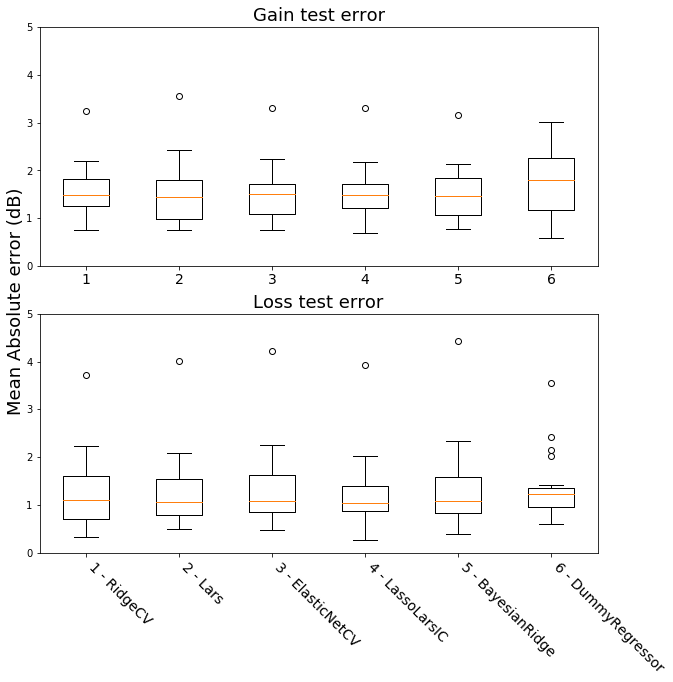

In [12]:
print(sortedDict.keys())
plotGrid(errorArray[0], errorArray[1])